<a href="https://colab.research.google.com/github/richeung1/Bank_Check_Extraction/blob/main/Bank_Check_Extraction_03Apr2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Environment ##

In [ ]:
!git clone https://github.com/OlafenwaMoses/ImageAI.git
!pip install -r "/content/ImageAI/requirements_gpu.txt"
!pip install -r "/content/ImageAI/requirements_extra.txt"
!pip install imageai --upgrade

## Downloading Pretrained Model##

In [ ]:
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/yolov3.pt

## Downloading Data ##

In [5]:
from google.cloud import storage
from tqdm import tqdm
import os

# keyfile and bucket_name removed for privacy

client = storage.Client()
bucket = client.get_bucket(bucket_name)

# List all blobs in the bucket and their subdirectories
blobs = list(bucket.list_blobs())

# Define the directory where you want to save the files
save_dir = "/content/"

# Download each blob and display a progress bar
for blob in tqdm(blobs):
    # Create a directory for the blob if it doesn't exist
    blob_dir = os.path.join(save_dir, os.path.dirname(blob.name))
    os.makedirs(blob_dir, exist_ok=True)

    # Download the blob to a file in the save directory
    blob.download_to_filename(os.path.join(save_dir, blob.name))

100%|██████████| 701/701 [01:03<00:00, 11.10it/s]


## Training on Yolov3 ##

In [ ]:
from imageai.Detection.Custom import DetectionModelTrainer

In [ ]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/Bank_Checks")
trainer.setTrainConfig(object_names_array=["check_number", "date", "payee", "amount"], batch_size=8, num_experiments=100, train_from_pretrained_model="/content/yolov3.pt")

In [ ]:
trainer.trainModel()

Generating anchor boxes for training images...
thr=0.25: 1.0000 best possible recall, 7.62 anchors past thr
n=9, img_size=416, metric_all=0.532/0.896-mean/best, past_thr=0.592-mean: 
Pretrained YOLOv3 model loaded to initialize weights
Epoch 1/100
----------
Train: 


35it [00:13,  2.55it/s]


    box loss-> 0.09720, object loss-> 0.32673, class loss-> 0.05252
Validation:


18it [03:01, 10.11s/it]


    recall: 0.010714 precision: 0.000169 mAP@0.5: 0.000038, mAP@0.5-0.95: 0.000009

Epoch 2/100
----------
Train: 


35it [00:04,  7.50it/s]


    box loss-> 0.08908, object loss-> 0.11907, class loss-> 0.04816
Validation:


18it [02:54,  9.70s/it]


    recall: 0.025000 precision: 0.000468 mAP@0.5: 0.000103, mAP@0.5-0.95: 0.000016

Epoch 3/100
----------
Train: 


35it [00:04,  7.40it/s]


    box loss-> 0.08320, object loss-> 0.11014, class loss-> 0.04431
Validation:


18it [02:46,  9.24s/it]


    recall: 0.060714 precision: 0.001731 mAP@0.5: 0.000585, mAP@0.5-0.95: 0.000083

Epoch 4/100
----------
Train: 


35it [00:04,  7.50it/s]


    box loss-> 0.07718, object loss-> 0.10298, class loss-> 0.04065
Validation:


18it [02:37,  8.74s/it]


    recall: 0.078571 precision: 0.006828 mAP@0.5: 0.003227, mAP@0.5-0.95: 0.000501

Epoch 5/100
----------
Train: 


35it [00:04,  7.47it/s]


    box loss-> 0.07078, object loss-> 0.09959, class loss-> 0.03721
Validation:


18it [02:30,  8.37s/it]


    recall: 0.064286 precision: 0.014058 mAP@0.5: 0.007496, mAP@0.5-0.95: 0.001152

Epoch 6/100
----------
Train: 


35it [00:04,  7.69it/s]


    box loss-> 0.06539, object loss-> 0.09746, class loss-> 0.03412
Validation:


18it [02:20,  7.78s/it]


    recall: 0.064286 precision: 0.028350 mAP@0.5: 0.015482, mAP@0.5-0.95: 0.002309

Epoch 7/100
----------
Train: 


35it [00:04,  7.66it/s]


    box loss-> 0.06099, object loss-> 0.09515, class loss-> 0.03109
Validation:


18it [02:13,  7.39s/it]


    recall: 0.089286 precision: 0.099166 mAP@0.5: 0.066489, mAP@0.5-0.95: 0.013245

Epoch 8/100
----------
Train: 


35it [00:04,  7.73it/s]


    box loss-> 0.05826, object loss-> 0.09193, class loss-> 0.02794
Validation:


18it [02:06,  7.02s/it]


    recall: 0.103571 precision: 0.160550 mAP@0.5: 0.119942, mAP@0.5-0.95: 0.031903

Epoch 9/100
----------
Train: 


35it [00:04,  7.60it/s]


    box loss-> 0.05681, object loss-> 0.08906, class loss-> 0.02482
Validation:


18it [01:59,  6.64s/it]


    recall: 0.117857 precision: 0.101817 mAP@0.5: 0.087008, mAP@0.5-0.95: 0.016110

Epoch 10/100
----------
Train: 


35it [00:04,  7.67it/s]


    box loss-> 0.05859, object loss-> 0.08982, class loss-> 0.02194
Validation:


18it [01:55,  6.42s/it]


    recall: 0.160714 precision: 0.180772 mAP@0.5: 0.162987, mAP@0.5-0.95: 0.047009

Epoch 11/100
----------
Train: 


35it [00:04,  7.83it/s]


    box loss-> 0.05778, object loss-> 0.08532, class loss-> 0.01942
Validation:


18it [01:54,  6.35s/it]


    recall: 0.149943 precision: 0.145810 mAP@0.5: 0.147509, mAP@0.5-0.95: 0.039903

Epoch 12/100
----------
Train: 


35it [00:04,  7.89it/s]


    box loss-> 0.05552, object loss-> 0.08360, class loss-> 0.01635
Validation:


18it [01:48,  6.05s/it]


    recall: 0.175000 precision: 0.136101 mAP@0.5: 0.149309, mAP@0.5-0.95: 0.027317

Epoch 13/100
----------
Train: 


35it [00:04,  7.73it/s]


    box loss-> 0.05632, object loss-> 0.08030, class loss-> 0.01352
Validation:


18it [01:46,  5.89s/it]


    recall: 0.192857 precision: 0.147298 mAP@0.5: 0.161331, mAP@0.5-0.95: 0.048592

Epoch 14/100
----------
Train: 


35it [00:04,  7.93it/s]


    box loss-> 0.05780, object loss-> 0.07910, class loss-> 0.01110
Validation:


18it [01:41,  5.64s/it]


    recall: 0.167857 precision: 0.120965 mAP@0.5: 0.141444, mAP@0.5-0.95: 0.027362

Epoch 15/100
----------
Train: 


35it [00:04,  7.78it/s]


    box loss-> 0.05968, object loss-> 0.08223, class loss-> 0.00999
Validation:


18it [01:29,  4.97s/it]


    recall: 0.128571 precision: 0.073394 mAP@0.5: 0.058156, mAP@0.5-0.95: 0.007037

Epoch 16/100
----------
Train: 


35it [00:04,  7.96it/s]


    box loss-> 0.05287, object loss-> 0.07498, class loss-> 0.00874
Validation:


18it [01:32,  5.16s/it]


    recall: 0.192857 precision: 0.104581 mAP@0.5: 0.112352, mAP@0.5-0.95: 0.032293

Epoch 17/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.05202, object loss-> 0.07322, class loss-> 0.00759
Validation:


18it [01:28,  4.90s/it]


    recall: 0.207143 precision: 0.102723 mAP@0.5: 0.121938, mAP@0.5-0.95: 0.027856

Epoch 18/100
----------
Train: 


35it [00:04,  7.73it/s]


    box loss-> 0.05416, object loss-> 0.07432, class loss-> 0.00698
Validation:


18it [01:24,  4.71s/it]


    recall: 0.175000 precision: 0.204819 mAP@0.5: 0.201111, mAP@0.5-0.95: 0.064274

Epoch 19/100
----------
Train: 


35it [00:04,  7.83it/s]


    box loss-> 0.05166, object loss-> 0.07193, class loss-> 0.00706
Validation:


18it [01:21,  4.53s/it]


    recall: 0.085714 precision: 0.111096 mAP@0.5: 0.090281, mAP@0.5-0.95: 0.014791

Epoch 20/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.04978, object loss-> 0.07103, class loss-> 0.00680
Validation:


18it [01:09,  3.87s/it]


    recall: 0.163933 precision: 0.108357 mAP@0.5: 0.117641, mAP@0.5-0.95: 0.019197

Epoch 21/100
----------
Train: 


35it [00:04,  7.79it/s]


    box loss-> 0.04940, object loss-> 0.06729, class loss-> 0.00644
Validation:


18it [01:11,  3.96s/it]


    recall: 0.156995 precision: 0.229148 mAP@0.5: 0.194102, mAP@0.5-0.95: 0.053183

Epoch 22/100
----------
Train: 


35it [00:04,  7.77it/s]


    box loss-> 0.05089, object loss-> 0.06747, class loss-> 0.00642
Validation:


18it [01:03,  3.51s/it]


    recall: 0.185369 precision: 0.281970 mAP@0.5: 0.208412, mAP@0.5-0.95: 0.046297

Epoch 23/100
----------
Train: 


35it [00:04,  7.85it/s]


    box loss-> 0.04517, object loss-> 0.06574, class loss-> 0.00636
Validation:


18it [00:57,  3.20s/it]


    recall: 0.238155 precision: 0.295453 mAP@0.5: 0.230308, mAP@0.5-0.95: 0.059387

Epoch 24/100
----------
Train: 


35it [00:04,  7.79it/s]


    box loss-> 0.04644, object loss-> 0.06736, class loss-> 0.00593
Validation:


18it [00:55,  3.06s/it]


    recall: 0.178472 precision: 0.188008 mAP@0.5: 0.119929, mAP@0.5-0.95: 0.028629

Epoch 25/100
----------
Train: 


35it [00:04,  7.89it/s]


    box loss-> 0.04256, object loss-> 0.06305, class loss-> 0.00564
Validation:


18it [00:52,  2.93s/it]


    recall: 0.222914 precision: 0.274405 mAP@0.5: 0.197241, mAP@0.5-0.95: 0.035903

Epoch 26/100
----------
Train: 


35it [00:04,  7.89it/s]


    box loss-> 0.04493, object loss-> 0.06281, class loss-> 0.00556
Validation:


18it [00:47,  2.61s/it]


    recall: 0.140972 precision: 0.258785 mAP@0.5: 0.138000, mAP@0.5-0.95: 0.022012

Epoch 27/100
----------
Train: 


35it [00:04,  7.91it/s]


    box loss-> 0.04885, object loss-> 0.06365, class loss-> 0.00621
Validation:


18it [00:42,  2.38s/it]


    recall: 0.332403 precision: 0.326506 mAP@0.5: 0.304077, mAP@0.5-0.95: 0.079935

Epoch 28/100
----------
Train: 


35it [00:04,  7.88it/s]


    box loss-> 0.04237, object loss-> 0.06161, class loss-> 0.00612
Validation:


18it [00:40,  2.22s/it]


    recall: 0.337981 precision: 0.293395 mAP@0.5: 0.319311, mAP@0.5-0.95: 0.111701

Epoch 29/100
----------
Train: 


35it [00:04,  7.74it/s]


    box loss-> 0.04332, object loss-> 0.06178, class loss-> 0.00553
Validation:


18it [00:35,  1.97s/it]


    recall: 0.403968 precision: 0.398659 mAP@0.5: 0.417955, mAP@0.5-0.95: 0.125086

Epoch 30/100
----------
Train: 


35it [00:04,  7.91it/s]


    box loss-> 0.04139, object loss-> 0.05981, class loss-> 0.00500
Validation:


18it [00:35,  1.98s/it]


    recall: 0.375397 precision: 0.391231 mAP@0.5: 0.408359, mAP@0.5-0.95: 0.160958

Epoch 31/100
----------
Train: 


35it [00:04,  7.86it/s]


    box loss-> 0.03779, object loss-> 0.05899, class loss-> 0.00508
Validation:


18it [00:31,  1.74s/it]


    recall: 0.407261 precision: 0.388275 mAP@0.5: 0.415495, mAP@0.5-0.95: 0.117219

Epoch 32/100
----------
Train: 


35it [00:04,  7.97it/s]


    box loss-> 0.03952, object loss-> 0.05735, class loss-> 0.00505
Validation:


18it [00:31,  1.77s/it]


    recall: 0.386706 precision: 0.420352 mAP@0.5: 0.429724, mAP@0.5-0.95: 0.118933

Epoch 33/100
----------
Train: 


35it [00:04,  7.95it/s]


    box loss-> 0.03615, object loss-> 0.05622, class loss-> 0.00448
Validation:


18it [00:27,  1.53s/it]


    recall: 0.403962 precision: 0.626176 mAP@0.5: 0.411960, mAP@0.5-0.95: 0.137988

Epoch 34/100
----------
Train: 


35it [00:04,  7.86it/s]


    box loss-> 0.03704, object loss-> 0.05485, class loss-> 0.00432
Validation:


18it [00:25,  1.43s/it]


    recall: 0.405719 precision: 0.477606 mAP@0.5: 0.391491, mAP@0.5-0.95: 0.096764

Epoch 35/100
----------
Train: 


35it [00:04,  7.96it/s]


    box loss-> 0.03559, object loss-> 0.05358, class loss-> 0.00445
Validation:


18it [00:23,  1.31s/it]


    recall: 0.504777 precision: 0.565002 mAP@0.5: 0.529828, mAP@0.5-0.95: 0.170656

Epoch 36/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.03255, object loss-> 0.05282, class loss-> 0.00423
Validation:


18it [00:25,  1.40s/it]


    recall: 0.558961 precision: 0.595305 mAP@0.5: 0.541692, mAP@0.5-0.95: 0.187115

Epoch 37/100
----------
Train: 


35it [00:04,  7.79it/s]


    box loss-> 0.03487, object loss-> 0.05261, class loss-> 0.00395
Validation:


18it [00:22,  1.24s/it]


    recall: 0.558917 precision: 0.539307 mAP@0.5: 0.559918, mAP@0.5-0.95: 0.201548

Epoch 38/100
----------
Train: 


35it [00:04,  7.94it/s]


    box loss-> 0.03475, object loss-> 0.05170, class loss-> 0.00382
Validation:


18it [00:21,  1.21s/it]


    recall: 0.576013 precision: 0.549134 mAP@0.5: 0.567524, mAP@0.5-0.95: 0.163945

Epoch 39/100
----------
Train: 


35it [00:04,  7.93it/s]


    box loss-> 0.02959, object loss-> 0.04955, class loss-> 0.00394
Validation:


18it [00:19,  1.10s/it]


    recall: 0.556189 precision: 0.567308 mAP@0.5: 0.608654, mAP@0.5-0.95: 0.186887

Epoch 40/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.03384, object loss-> 0.05085, class loss-> 0.00374
Validation:


18it [00:18,  1.00s/it]


    recall: 0.532700 precision: 0.630051 mAP@0.5: 0.584191, mAP@0.5-0.95: 0.227922

Epoch 41/100
----------
Train: 


35it [00:04,  7.95it/s]


    box loss-> 0.02889, object loss-> 0.04801, class loss-> 0.00356
Validation:


18it [00:18,  1.04s/it]


    recall: 0.649231 precision: 0.501012 mAP@0.5: 0.628952, mAP@0.5-0.95: 0.244074

Epoch 42/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.03149, object loss-> 0.04981, class loss-> 0.00361
Validation:


18it [00:19,  1.08s/it]


    recall: 0.599303 precision: 0.550172 mAP@0.5: 0.604096, mAP@0.5-0.95: 0.236078

Epoch 43/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.02969, object loss-> 0.04883, class loss-> 0.00383
Validation:


18it [00:16,  1.06it/s]


    recall: 0.618314 precision: 0.706135 mAP@0.5: 0.676909, mAP@0.5-0.95: 0.291225

Epoch 44/100
----------
Train: 


35it [00:04,  7.85it/s]


    box loss-> 0.02775, object loss-> 0.04838, class loss-> 0.00349
Validation:


18it [00:15,  1.13it/s]


    recall: 0.639247 precision: 0.795141 mAP@0.5: 0.690053, mAP@0.5-0.95: 0.265571

Epoch 45/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.03072, object loss-> 0.04925, class loss-> 0.00325
Validation:


18it [00:16,  1.10it/s]


    recall: 0.601814 precision: 0.837275 mAP@0.5: 0.715351, mAP@0.5-0.95: 0.280534

Epoch 46/100
----------
Train: 


35it [00:04,  8.01it/s]


    box loss-> 0.02754, object loss-> 0.04705, class loss-> 0.00318
Validation:


18it [00:14,  1.21it/s]


    recall: 0.667326 precision: 0.772364 mAP@0.5: 0.757163, mAP@0.5-0.95: 0.312296

Epoch 47/100
----------
Train: 


35it [00:04,  7.77it/s]


    box loss-> 0.02628, object loss-> 0.04491, class loss-> 0.00330
Validation:


18it [00:16,  1.12it/s]


    recall: 0.588089 precision: 0.764406 mAP@0.5: 0.669905, mAP@0.5-0.95: 0.241036

Epoch 48/100
----------
Train: 


35it [00:04,  7.91it/s]


    box loss-> 0.02850, object loss-> 0.04670, class loss-> 0.00323
Validation:


18it [00:13,  1.32it/s]


    recall: 0.766122 precision: 0.775824 mAP@0.5: 0.819795, mAP@0.5-0.95: 0.344385

Epoch 49/100
----------
Train: 


35it [00:04,  7.87it/s]


    box loss-> 0.02418, object loss-> 0.04401, class loss-> 0.00294
Validation:


18it [00:13,  1.38it/s]


    recall: 0.724222 precision: 0.842482 mAP@0.5: 0.836245, mAP@0.5-0.95: 0.362912

Epoch 50/100
----------
Train: 


35it [00:04,  7.98it/s]


    box loss-> 0.02712, object loss-> 0.04477, class loss-> 0.00281
Validation:


18it [00:12,  1.42it/s]


    recall: 0.755620 precision: 0.803906 mAP@0.5: 0.837020, mAP@0.5-0.95: 0.370778

Epoch 51/100
----------
Train: 


35it [00:04,  7.91it/s]


    box loss-> 0.02634, object loss-> 0.04328, class loss-> 0.00305
Validation:


18it [00:12,  1.50it/s]


    recall: 0.816468 precision: 0.676216 mAP@0.5: 0.821354, mAP@0.5-0.95: 0.345048

Epoch 52/100
----------
Train: 


35it [00:04,  7.92it/s]


    box loss-> 0.02504, object loss-> 0.04343, class loss-> 0.00298
Validation:


18it [00:11,  1.62it/s]


    recall: 0.779511 precision: 0.718394 mAP@0.5: 0.818007, mAP@0.5-0.95: 0.294269

Epoch 53/100
----------
Train: 


35it [00:04,  7.91it/s]


    box loss-> 0.02627, object loss-> 0.04513, class loss-> 0.00301
Validation:


18it [00:11,  1.58it/s]


    recall: 0.705082 precision: 0.814771 mAP@0.5: 0.863698, mAP@0.5-0.95: 0.361721

Epoch 54/100
----------
Train: 


35it [00:04,  7.85it/s]


    box loss-> 0.02349, object loss-> 0.04181, class loss-> 0.00279
Validation:


18it [00:10,  1.65it/s]


    recall: 0.794805 precision: 0.759099 mAP@0.5: 0.856330, mAP@0.5-0.95: 0.346789

Epoch 55/100
----------
Train: 


35it [00:04,  7.93it/s]


    box loss-> 0.02347, object loss-> 0.04104, class loss-> 0.00247
Validation:


18it [00:09,  1.84it/s]


    recall: 0.772448 precision: 0.849524 mAP@0.5: 0.891616, mAP@0.5-0.95: 0.402618

Epoch 56/100
----------
Train: 


35it [00:04,  7.94it/s]


    box loss-> 0.02487, object loss-> 0.04258, class loss-> 0.00246
Validation:


18it [00:09,  1.86it/s]


    recall: 0.784728 precision: 0.796005 mAP@0.5: 0.877049, mAP@0.5-0.95: 0.373229

Epoch 57/100
----------
Train: 


35it [00:04,  7.79it/s]


    box loss-> 0.02156, object loss-> 0.04065, class loss-> 0.00258
Validation:


18it [00:09,  1.86it/s]


    recall: 0.778803 precision: 0.831662 mAP@0.5: 0.864856, mAP@0.5-0.95: 0.360704

Epoch 58/100
----------
Train: 


35it [00:04,  7.88it/s]


    box loss-> 0.02260, object loss-> 0.04134, class loss-> 0.00255
Validation:


18it [00:09,  1.92it/s]


    recall: 0.837147 precision: 0.841840 mAP@0.5: 0.890884, mAP@0.5-0.95: 0.384514

Epoch 59/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.02235, object loss-> 0.03928, class loss-> 0.00273
Validation:


18it [00:08,  2.03it/s]


    recall: 0.782949 precision: 0.774145 mAP@0.5: 0.854594, mAP@0.5-0.95: 0.366664

Epoch 60/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.02116, object loss-> 0.03821, class loss-> 0.00268
Validation:


18it [00:09,  1.91it/s]


    recall: 0.719369 precision: 0.787885 mAP@0.5: 0.860866, mAP@0.5-0.95: 0.363478

Epoch 61/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.02367, object loss-> 0.04058, class loss-> 0.00262
Validation:


18it [00:08,  2.03it/s]


    recall: 0.817555 precision: 0.754317 mAP@0.5: 0.872713, mAP@0.5-0.95: 0.386881

Epoch 62/100
----------
Train: 


35it [00:04,  7.81it/s]


    box loss-> 0.02135, object loss-> 0.03857, class loss-> 0.00254
Validation:


18it [00:09,  1.97it/s]


    recall: 0.768831 precision: 0.795748 mAP@0.5: 0.868242, mAP@0.5-0.95: 0.368652

Epoch 63/100
----------
Train: 


35it [00:04,  7.93it/s]


    box loss-> 0.02227, object loss-> 0.03891, class loss-> 0.00232
Validation:


18it [00:08,  2.04it/s]


    recall: 0.799582 precision: 0.804602 mAP@0.5: 0.869732, mAP@0.5-0.95: 0.335754

Epoch 64/100
----------
Train: 


35it [00:04,  8.01it/s]


    box loss-> 0.02246, object loss-> 0.03941, class loss-> 0.00230
Validation:


18it [00:08,  2.12it/s]


    recall: 0.836515 precision: 0.772275 mAP@0.5: 0.875294, mAP@0.5-0.95: 0.378108

Epoch 65/100
----------
Train: 


35it [00:04,  7.95it/s]


    box loss-> 0.01858, object loss-> 0.03622, class loss-> 0.00220
Validation:


18it [00:08,  2.21it/s]


    recall: 0.833086 precision: 0.778636 mAP@0.5: 0.884147, mAP@0.5-0.95: 0.407030

Epoch 66/100
----------
Train: 


35it [00:04,  7.79it/s]


    box loss-> 0.02068, object loss-> 0.03961, class loss-> 0.00204
Validation:


18it [00:08,  2.13it/s]


    recall: 0.820984 precision: 0.807203 mAP@0.5: 0.886352, mAP@0.5-0.95: 0.429753

Epoch 67/100
----------
Train: 


35it [00:04,  7.99it/s]


    box loss-> 0.01988, object loss-> 0.03752, class loss-> 0.00204
Validation:


18it [00:08,  2.25it/s]


    recall: 0.813733 precision: 0.808886 mAP@0.5: 0.887930, mAP@0.5-0.95: 0.430078

Epoch 68/100
----------
Train: 


35it [00:04,  7.83it/s]


    box loss-> 0.01779, object loss-> 0.03456, class loss-> 0.00199
Validation:


18it [00:07,  2.33it/s]


    recall: 0.678967 precision: 0.808442 mAP@0.5: 0.811449, mAP@0.5-0.95: 0.372284

Epoch 69/100
----------
Train: 


35it [00:04,  7.81it/s]


    box loss-> 0.02140, object loss-> 0.03836, class loss-> 0.00203
Validation:


18it [00:07,  2.31it/s]


    recall: 0.764201 precision: 0.761876 mAP@0.5: 0.852920, mAP@0.5-0.95: 0.375296

Epoch 70/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.01833, object loss-> 0.03516, class loss-> 0.00220
Validation:


18it [00:07,  2.30it/s]


    recall: 0.803508 precision: 0.756129 mAP@0.5: 0.867361, mAP@0.5-0.95: 0.379423

Epoch 71/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.01860, object loss-> 0.03469, class loss-> 0.00211
Validation:


18it [00:07,  2.36it/s]


    recall: 0.788642 precision: 0.759340 mAP@0.5: 0.851522, mAP@0.5-0.95: 0.373475

Epoch 72/100
----------
Train: 


35it [00:04,  7.90it/s]


    box loss-> 0.01919, object loss-> 0.03577, class loss-> 0.00207
Validation:


18it [00:07,  2.49it/s]


    recall: 0.812897 precision: 0.830426 mAP@0.5: 0.889355, mAP@0.5-0.95: 0.420865

Epoch 73/100
----------
Train: 


35it [00:04,  7.76it/s]


    box loss-> 0.01543, object loss-> 0.03147, class loss-> 0.00195
Validation:


18it [00:07,  2.51it/s]


    recall: 0.816498 precision: 0.774903 mAP@0.5: 0.865300, mAP@0.5-0.95: 0.406085

Epoch 74/100
----------
Train: 


35it [00:04,  7.86it/s]


    box loss-> 0.01822, object loss-> 0.03429, class loss-> 0.00178
Validation:


18it [00:06,  2.62it/s]


    recall: 0.737573 precision: 0.821432 mAP@0.5: 0.843987, mAP@0.5-0.95: 0.391144

Epoch 75/100
----------
Train: 


35it [00:04,  7.82it/s]


    box loss-> 0.01745, object loss-> 0.03395, class loss-> 0.00183
Validation:


18it [00:06,  2.67it/s]


    recall: 0.816432 precision: 0.788905 mAP@0.5: 0.853778, mAP@0.5-0.95: 0.395106

Epoch 76/100
----------
Train: 


35it [00:04,  7.87it/s]


    box loss-> 0.01493, object loss-> 0.03160, class loss-> 0.00186
Validation:


18it [00:06,  2.63it/s]


    recall: 0.821392 precision: 0.821659 mAP@0.5: 0.893245, mAP@0.5-0.95: 0.416846

Epoch 77/100
----------
Train: 


35it [00:04,  7.83it/s]


    box loss-> 0.01696, object loss-> 0.03321, class loss-> 0.00181
Validation:


18it [00:06,  2.61it/s]


    recall: 0.775952 precision: 0.858101 mAP@0.5: 0.893465, mAP@0.5-0.95: 0.410891

Epoch 78/100
----------
Train: 


35it [00:04,  7.84it/s]


    box loss-> 0.01554, object loss-> 0.03172, class loss-> 0.00179
Validation:


18it [00:06,  2.63it/s]


    recall: 0.863225 precision: 0.768678 mAP@0.5: 0.892859, mAP@0.5-0.95: 0.407721

Epoch 79/100
----------
Train: 


35it [00:04,  7.87it/s]


    box loss-> 0.01587, object loss-> 0.03051, class loss-> 0.00170
Validation:


18it [00:06,  2.74it/s]


    recall: 0.802451 precision: 0.830701 mAP@0.5: 0.898177, mAP@0.5-0.95: 0.410073

Epoch 80/100
----------
Train: 


35it [00:04,  7.97it/s]


    box loss-> 0.01548, object loss-> 0.03085, class loss-> 0.00166
Validation:


18it [00:06,  2.73it/s]


    recall: 0.797694 precision: 0.833793 mAP@0.5: 0.890310, mAP@0.5-0.95: 0.404264

Epoch 81/100
----------
Train: 


35it [00:04,  7.87it/s]


    box loss-> 0.01245, object loss-> 0.02715, class loss-> 0.00158
Validation:


18it [00:06,  2.83it/s]


    recall: 0.789557 precision: 0.829531 mAP@0.5: 0.883318, mAP@0.5-0.95: 0.398952

Epoch 82/100
----------
Train: 


35it [00:04,  7.86it/s]


    box loss-> 0.01489, object loss-> 0.02963, class loss-> 0.00146
Validation:


18it [00:06,  2.89it/s]


    recall: 0.781355 precision: 0.795267 mAP@0.5: 0.873050, mAP@0.5-0.95: 0.391890

Epoch 83/100
----------
Train: 


35it [00:04,  7.93it/s]


    box loss-> 0.01441, object loss-> 0.02848, class loss-> 0.00144
Validation:


18it [00:06,  2.99it/s]


    recall: 0.830603 precision: 0.756493 mAP@0.5: 0.873786, mAP@0.5-0.95: 0.382470

Epoch 84/100
----------
Train: 


35it [00:04,  7.78it/s]


    box loss-> 0.01330, object loss-> 0.02768, class loss-> 0.00141
Validation:


18it [00:06,  2.95it/s]


    recall: 0.827461 precision: 0.741060 mAP@0.5: 0.866066, mAP@0.5-0.95: 0.387111

Epoch 85/100
----------
Train: 


35it [00:04,  7.89it/s]


    box loss-> 0.01330, object loss-> 0.02782, class loss-> 0.00139
Validation:


18it [00:06,  2.95it/s]


    recall: 0.751876 precision: 0.811360 mAP@0.5: 0.862514, mAP@0.5-0.95: 0.395276

Epoch 86/100
----------
Train: 


35it [00:04,  7.92it/s]


    box loss-> 0.01069, object loss-> 0.02394, class loss-> 0.00134
Validation:


18it [00:05,  3.00it/s]


    recall: 0.808275 precision: 0.750906 mAP@0.5: 0.865724, mAP@0.5-0.95: 0.389995

Epoch 87/100
----------
Train: 


35it [00:04,  7.88it/s]


    box loss-> 0.01095, object loss-> 0.02467, class loss-> 0.00125
Validation:


18it [00:06,  2.98it/s]


    recall: 0.830297 precision: 0.762420 mAP@0.5: 0.881163, mAP@0.5-0.95: 0.400852

Epoch 88/100
----------
Train: 


35it [00:04,  7.97it/s]


    box loss-> 0.01146, object loss-> 0.02550, class loss-> 0.00120
Validation:


18it [00:05,  3.03it/s]


    recall: 0.842323 precision: 0.769317 mAP@0.5: 0.882265, mAP@0.5-0.95: 0.402635

Epoch 89/100
----------
Train: 


35it [00:04,  7.96it/s]


    box loss-> 0.00993, object loss-> 0.02205, class loss-> 0.00115
Validation:


18it [00:05,  3.08it/s]


    recall: 0.822409 precision: 0.794369 mAP@0.5: 0.887058, mAP@0.5-0.95: 0.410447

Epoch 90/100
----------
Train: 


35it [00:04,  7.86it/s]


    box loss-> 0.01033, object loss-> 0.02256, class loss-> 0.00111
Validation:


18it [00:05,  3.06it/s]


    recall: 0.810461 precision: 0.788113 mAP@0.5: 0.884734, mAP@0.5-0.95: 0.398164

Epoch 91/100
----------
Train: 


35it [00:04,  7.88it/s]


    box loss-> 0.00972, object loss-> 0.02265, class loss-> 0.00108
Validation:


18it [00:05,  3.09it/s]


    recall: 0.834635 precision: 0.764275 mAP@0.5: 0.879699, mAP@0.5-0.95: 0.404091

Epoch 92/100
----------
Train: 


35it [00:04,  7.75it/s]


    box loss-> 0.00931, object loss-> 0.02133, class loss-> 0.00103
Validation:


18it [00:05,  3.10it/s]


    recall: 0.841877 precision: 0.755300 mAP@0.5: 0.883278, mAP@0.5-0.95: 0.403960

Epoch 93/100
----------
Train: 


35it [00:04,  7.92it/s]


    box loss-> 0.00933, object loss-> 0.02175, class loss-> 0.00100
Validation:


18it [00:05,  3.16it/s]


    recall: 0.770246 precision: 0.852321 mAP@0.5: 0.885354, mAP@0.5-0.95: 0.414429

Epoch 94/100
----------
Train: 


35it [00:04,  7.85it/s]


    box loss-> 0.00870, object loss-> 0.02015, class loss-> 0.00096
Validation:


18it [00:05,  3.13it/s]


    recall: 0.791328 precision: 0.819730 mAP@0.5: 0.879938, mAP@0.5-0.95: 0.411602

Epoch 95/100
----------
Train: 


35it [00:04,  7.77it/s]


    box loss-> 0.00861, object loss-> 0.01975, class loss-> 0.00094
Validation:


18it [00:05,  3.18it/s]


    recall: 0.831436 precision: 0.762394 mAP@0.5: 0.872623, mAP@0.5-0.95: 0.415191

Epoch 96/100
----------
Train: 


35it [00:04,  7.80it/s]


    box loss-> 0.00842, object loss-> 0.01934, class loss-> 0.00091
Validation:


18it [00:05,  3.21it/s]


    recall: 0.831691 precision: 0.751441 mAP@0.5: 0.874626, mAP@0.5-0.95: 0.411470

Epoch 97/100
----------
Train: 


35it [00:04,  7.83it/s]


    box loss-> 0.00828, object loss-> 0.01897, class loss-> 0.00088
Validation:


18it [00:05,  3.19it/s]


    recall: 0.841317 precision: 0.760729 mAP@0.5: 0.875938, mAP@0.5-0.95: 0.412999

Epoch 98/100
----------
Train: 


35it [00:04,  7.85it/s]


    box loss-> 0.00832, object loss-> 0.01904, class loss-> 0.00087
Validation:


18it [00:05,  3.15it/s]


    recall: 0.824082 precision: 0.764240 mAP@0.5: 0.873711, mAP@0.5-0.95: 0.411746

Epoch 99/100
----------
Train: 


35it [00:04,  7.95it/s]


    box loss-> 0.00821, object loss-> 0.01878, class loss-> 0.00085
Validation:


18it [00:05,  3.20it/s]


    recall: 0.824890 precision: 0.756482 mAP@0.5: 0.873814, mAP@0.5-0.95: 0.411036

Epoch 100/100
----------
Train: 


35it [00:04,  7.88it/s]


    box loss-> 0.00812, object loss-> 0.01862, class loss-> 0.00084
Validation:


18it [00:05,  3.17it/s]


    recall: 0.837021 precision: 0.750940 mAP@0.5: 0.873984, mAP@0.5-0.95: 0.409803

Training completed in 69m 21s


##Inference on Yolov3##

In [6]:
from imageai.Detection.Custom import CustomObjectDetection

In [7]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/Bank_Checks/models/yolov3_Bank_Checks_mAP-0.89818_epoch-79.pt")
detector.setJsonPath("/content/Bank_Checks/json/Bank_Checks_yolov3_detection_config.json")
detector.loadModel()

In [54]:
image_path = "/content/dummycheck1.JPG"
image_result = "/content/dummycheck1_result.JPG"

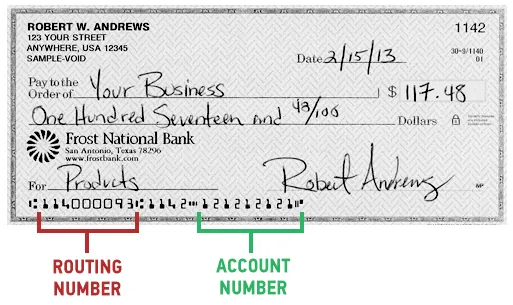

In [55]:
from PIL import Image
img = Image.open(image_path)
img

In [62]:
# No extraction yet
detections = detector.detectObjectsFromImage(input_image=image_path, output_image_path=image_result, minimum_percentage_probability=90, extract_detected_objects=False)

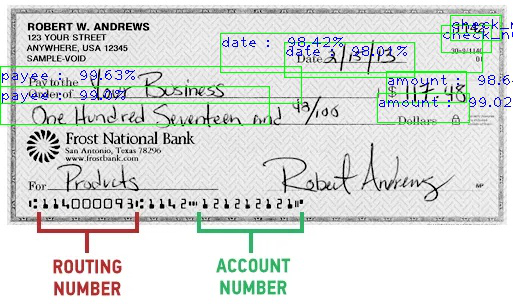

In [63]:
img_result = Image.open(image_result)
img_result

In [64]:
import cv2
import os

min_probability = 90

# Apply Non-Maximum Suppression to the detected objects
boxes = []
scores = []
labels = []
for detection in detections:
    boxes.append(detection["box_points"])
    scores.append(detection["percentage_probability"])
    labels.append(detection["name"])

indices = cv2.dnn.NMSBoxes(boxes, scores, min_probability/100, 0.3)

# Draw the bounding boxes on the original image
image = cv2.imread(image_path)
for i in indices.flatten():
    x1, y1, x2, y2 = boxes[i]
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image, labels[i] + " : " + str(scores[i]), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Save the image with the bounding boxes
cv2.imwrite("/content/dummycheck1_result_final.JPG", image)

True

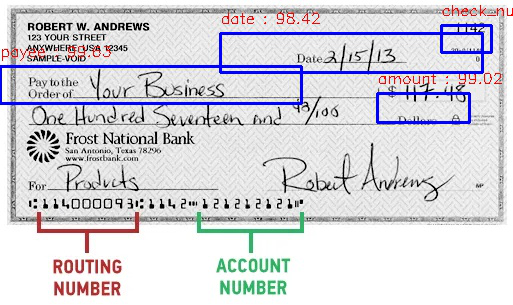

In [65]:
img_result_final = Image.open("/content/dummycheck1_result_final.JPG")
img_result_final

In [66]:
# Create a directory to save the individual object images
os.makedirs("detected_objects", exist_ok=True)

# Extract each object to jpeg
for i in indices.flatten():
    label = labels[i]
    score = scores[i]
    x1, y1, x2, y2 = boxes[i]
    object_img = image[y1:y2, x1:x2]
    object_filename = f"detected_objects/{label}_{score:.2f}.jpg"
    cv2.imwrite(object_filename, object_img)